# 비 지도 학습(K-Means Clustering)

In [22]:
import numpy as np
import pandas as pd

# K-Means 라이브러리
from sklearn.cluster import KMeans

# 시각화 라이브러리
import matplotlib.pyplot as plt
# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

## 1. 데이터 불러오기

In [2]:
#CSV 파일을 읽어 DataFrame 변수에 저장하기
studentData = pd.read_csv("../Python_ST_EX/dataset/student_middle.csv")
studentData.head()

,NAME,SW,DB,AND
0,ST0001,95,30,0
1,ST0002,50,50,0
2,ST0003,15,30,15
3,ST0004,90,50,20
4,ST0005,75,20,20


## 2. 데이터 분리

In [3]:
# 기본정보 가지고 있기
name = studentData[["NAME"]]

# 특성정보 분리
features = studentData[["SW","DB","AND"]]

## 3. 모델선언 및 자율학습 예측

In [4]:
# 모델선언 및 feature 만 활용하여 자율학습 예측
model = KMeans(n_clusters=2, algorithm="auto")
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## 4. 데이터 정리

In [8]:
predict = pd.DataFrame(model.predict(features))
predict.columns=["PREDICT"]
# name, feature, predict 붙이기
result = pd.concat([name, features, predict], axis = 1)
result.head()

,NAME,SW,DB,AND,PREDICT
0,ST0001,95,30,0,1
1,ST0002,50,50,0,1
2,ST0003,15,30,15,1
3,ST0004,90,50,20,1
4,ST0005,75,20,20,1


## 5. 시각화

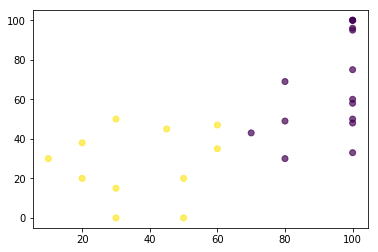

In [6]:
# 시각화 하기
plt.scatter(result['DB'],result["AND"], c = result["PREDICT"], alpha=0.7)

In [29]:
customerData = pd.read_csv("../Python_ST_EX/dataset/customerData.csv")
customerData.head()

,CUSTID,AVERAGEPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6.4,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4.0,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5.0,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6.6,0.900000,Early-bird
4,B10634,3391.074215,2,4.2,2.453656,Sleeping-dog


In [30]:
customerData.groupby(["CUSTTYPE"]).mean()

,AVERAGEPRICE,EMI,DEVICECOUNT,PRODUCTAGE
CUSTTYPE,,,,
Big-Screen-lover,3564.108000,2.04,5.552,2.193531
Early-bird,3287.125090,2.30,6.462,0.946000
Sleeping-dog,3446.990233,1.82,4.260,2.658271


In [31]:
customerData["CUSTTYPENUMBER"] = np.where(customerData["CUSTTYPE"] == "Big-Screen-lover", 0, \
                                         np.where(customerData["CUSTTYPE"] == "Sleeping-dog", 1, \
                                                 np.where(customerData["CUSTTYPE"] == "Early-bird", 2, "ERROR")))

In [35]:
# 기본정보 가지고 있기
nameCustomer = customerData[["CUSTID"]]

# 특성정보 분리
featuresCustomer = customerData[["DEVICECOUNT", "PRODUCTAGE"]]

# 모델선언 및 feature 만 활용하여 자율학습 예측
modelCustomer = KMeans(n_clusters = 3, algorithm = "auto")
modelCustomer.fit(featuresCustomer)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
predictCustomer = pd.DataFrame(modelCustomer.predict(featuresCustomer))
predictCustomer.columns=["PREDICT"]
# name, feature, predict 붙이기
resultCustomer = pd.concat([nameCustomer, featuresCustomer, predictCustomer, customerData["CUSTTYPENUMBER"]], axis = 1)
resultCustomer.head()

,CUSTID,DEVICECOUNT,PRODUCTAGE,PREDICT,CUSTTYPENUMBER
0,A13566,6.4,1.679181,1,0
1,A14219,4.0,2.682023,0,1
2,A15312,5.0,3.208202,0,1
3,A16605,6.6,0.900000,1,2
4,B10634,4.2,2.453656,0,1


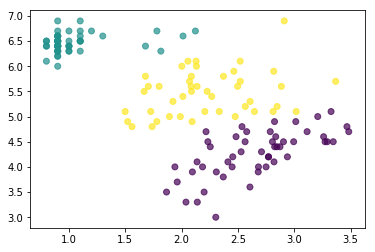

In [37]:
# 시각화 하기
plt.scatter(resultCustomer['PRODUCTAGE'],resultCustomer["DEVICECOUNT"], c = resultCustomer["PREDICT"], alpha=0.7)